In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np
#plot the depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score



df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]


X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)


In [64]:

#Boosting_ADABoost
max_n_estimators = range(1, 20, 1)

train_prec = []
test_prec = []

train_recall = []
test_recall = []


cross_val_recall_avg =[]
cross_val_recall_std = []

depths = [2,4,6]
estimators = []

#for max_depth in depths:
depth_train_prec = []
depth_test_prec = []

depth_train_recall = []
depth_test_recall = []

depth_cross_val_recall_avg = []
depth_cross_val_recall_std = []

    
for i, o in enumerate(max_n_estimators):
    print ('Boosting dtree with estimators=' + str(o))
    dt = DecisionTreeClassifier(max_depth=1)
    clf = AdaBoostClassifier(base_estimator=dt, n_estimators=o)
    scores_recall =cross_validate(clf, X_train, y_train, cv=3, scoring='recall',return_train_score=True,return_estimator=True)

    ind= np.argmax(scores_recall['test_score'])
    estimators.append(scores_recall['estimator'][ind])


    depth_cross_val_recall_std.append(np.std(scores_recall['test_score']))
    depth_cross_val_recall_avg.append(np.average(scores_recall['test_score']))

    est = scores_recall['estimator'][ind]

    depth_train_prec.append(precision_score(y_train, est.predict(X_train)))
    depth_test_prec.append(precision_score(y_test, est.predict(X_test)))

    depth_train_recall.append(recall_score(y_train, est.predict(X_train)))
    depth_test_recall.append(recall_score(y_test, est.predict(X_test)))

    #clf.fit(X_train, y_train)



    print(confusion_matrix(y_test, est.predict(X_test)))

        
    #cross_val_recall_avg.append(depth_cross_val_recall_avg)
    #cross_val_recall_std.append(depth_cross_val_recall_std)
    #train_precision.append(depth_train_prec)
    #test_precision.append(depth_test_prec)
    #train_recall.append(depth_train_recall)
    #test_recall.append(depth_test_recall)
    

Boosting dtree with estimators=1
[[69 14]
 [ 6 54]]
Boosting dtree with estimators=2
[[71 12]
 [ 0 60]]
Boosting dtree with estimators=3
[[77  6]
 [ 3 57]]
Boosting dtree with estimators=4
[[76  7]
 [ 3 57]]
Boosting dtree with estimators=5
[[79  4]
 [ 3 57]]
Boosting dtree with estimators=6
[[78  5]
 [ 4 56]]
Boosting dtree with estimators=7
[[79  4]
 [ 4 56]]
Boosting dtree with estimators=8
[[79  4]
 [ 3 57]]
Boosting dtree with estimators=9
[[79  4]
 [ 4 56]]
Boosting dtree with estimators=10
[[78  5]
 [ 3 57]]
Boosting dtree with estimators=11
[[78  5]
 [ 3 57]]
Boosting dtree with estimators=12
[[79  4]
 [ 3 57]]
Boosting dtree with estimators=13
[[78  5]
 [ 3 57]]
Boosting dtree with estimators=14
[[79  4]
 [ 3 57]]
Boosting dtree with estimators=15
[[79  4]
 [ 3 57]]
Boosting dtree with estimators=16
[[81  2]
 [ 3 57]]
Boosting dtree with estimators=17
[[81  2]
 [ 3 57]]
Boosting dtree with estimators=18
[[81  2]
 [ 3 57]]
Boosting dtree with estimators=19
[[81  2]
 [ 3 57]]


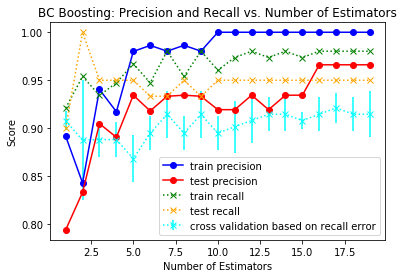

In [65]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('BC Boosting: Precision and Recall vs. Number of Estimators')
#plt.ylim((0,1))




plt.plot(max_n_estimators, depth_train_prec, 'o-', color='blue', label='train precision')
plt.plot(max_n_estimators, depth_test_prec,'o-',  color='red', label='test precision')

plt.plot(max_n_estimators, depth_train_recall, 'x', color='green', label='train recall', linestyle=':')
plt.errorbar(max_n_estimators, depth_cross_val_recall_avg,yerr=list(depth_cross_val_recall_std), linestyle=':',fmt='x',color='cyan', label='cross validation based on recall error')
plt.plot(max_n_estimators, depth_test_recall,  'x', color='orange', label='test recall', linestyle=':')

plt.xlabel("Number of Estimators")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [58]:

#Boosting_ADABoost
max_n_estimators = range(1, 20, 1)

train_prec = []
test_prec = []

train_recall = []
test_recall = []


cross_val_recall_avg =[]
cross_val_recall_std = []

depths = range(1, 16, 1)
estimators = []

#for max_depth in depths:
depth_train_prec = []
depth_test_prec = []

depth_train_recall = []
depth_test_recall = []

depth_cross_val_recall_avg = []
depth_cross_val_recall_std = []

    
for i, o in enumerate(depths):
    print(i)
    dt = DecisionTreeClassifier(max_depth=o)
    clf = AdaBoostClassifier(base_estimator=dt, n_estimators=15)
    scores_recall =cross_validate(clf, X_train, y_train, cv=3, scoring='recall',return_train_score=True,return_estimator=True)

    ind= np.argmax(scores_recall['test_score'])
    estimators.append(scores_recall['estimator'][ind])


    depth_cross_val_recall_std.append(np.std(scores_recall['test_score']))
    depth_cross_val_recall_avg.append(np.average(scores_recall['test_score']))

    est = scores_recall['estimator'][ind]

    depth_train_prec.append(precision_score(y_train, est.predict(X_train)))
    depth_test_prec.append(precision_score(y_test, est.predict(X_test)))

    depth_train_recall.append(recall_score(y_train, est.predict(X_train)))
    depth_test_recall.append(recall_score(y_test, est.predict(X_test)))

    #clf.fit(X_train, y_train)



    print(confusion_matrix(y_test, est.predict(X_test)))

        
    #cross_val_recall_avg.append(depth_cross_val_recall_avg)
    #cross_val_recall_std.append(depth_cross_val_recall_std)
    #train_precision.append(depth_train_prec)
    #test_precision.append(depth_test_prec)
    #train_recall.append(depth_train_recall)
    #test_recall.append(depth_test_recall)
    

0
[[79  4]
 [ 3 57]]
1
[[81  2]
 [ 2 58]]
2
[[79  4]
 [ 3 57]]
3
[[81  2]
 [ 7 53]]
4
[[76  7]
 [ 3 57]]
5
[[72 11]
 [ 5 55]]
6
[[76  7]
 [ 4 56]]
7
[[76  7]
 [ 3 57]]
8
[[76  7]
 [ 3 57]]
9
[[72 11]
 [ 5 55]]
10
[[76  7]
 [ 3 57]]
11
[[77  6]
 [ 4 56]]
12
[[72 11]
 [ 5 55]]
13
[[72 11]
 [ 5 55]]
14
[[71 12]
 [ 4 56]]


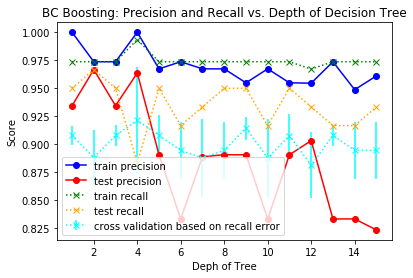

In [63]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('BC Boosting: Precision and Recall vs. Depth of Decision Tree')
#plt.ylim((0,1))




plt.plot(depths, depth_train_prec, 'o-', color='blue', label='train precision')
plt.plot(depths, depth_test_prec,'o-',  color='red', label='test precision')

plt.plot(depths, depth_train_recall, 'x', color='green', label='train recall', linestyle=':')
plt.errorbar(depths, depth_cross_val_recall_avg,yerr=list(depth_cross_val_recall_std), linestyle=':',fmt='x',color='cyan', label='cross validation based on recall error')
plt.plot(depths, depth_test_recall,  'x', color='orange', label='test recall', linestyle=':')

plt.xlabel("Deph of Tree")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [62]:
depth_cross_val_recall_std

[0.00850376782603431,
 0.024688931488267746,
 0.009738342761928946,
 0.04786920251436569,
 0.018128037462336967,
 0.02568153426300218,
 0.03476436120432667,
 0.02568153426300218,
 0.010167548487649667,
 0.03476436120432667,
 0.019595638903470308,
 0.02920859383724826,
 0.009738342761928946,
 0.02568153426300218,
 0.02568153426300218]

In [72]:
#Training set size
#Boosting_ADABoost
max_n_estimators = range(1, 20, 1)

train_prec = []
test_prec = []

train_recall = []
test_recall = []


cross_val_recall_avg =[]
cross_val_recall_std = []

portions = range(10, 101, 10)
estimators = []

#for max_depth in depths:
depth_train_prec = []
depth_test_prec = []

depth_train_recall = []
depth_test_recall = []

depth_cross_val_recall_avg = []
depth_cross_val_recall_std = []

    
for i, o in enumerate(portions):
    print(i)
    end = int(len(X_train)* o/100.0)
    dt = DecisionTreeClassifier(max_depth=1)
    clf = AdaBoostClassifier(base_estimator=dt, n_estimators=15)
    scores_recall =cross_validate(clf, X_train[:end], y_train[:end], cv=3, scoring='recall',return_train_score=True,return_estimator=True)

    ind= np.argmax(scores_recall['test_score'])
    estimators.append(scores_recall['estimator'][ind])


    depth_cross_val_recall_std.append(np.std(scores_recall['test_score']))
    depth_cross_val_recall_avg.append(np.average(scores_recall['test_score']))

    est = scores_recall['estimator'][ind]

    depth_train_prec.append(precision_score(y_train[:end], est.predict(X_train[:end])))
    depth_test_prec.append(precision_score(y_test, est.predict(X_test)))

    depth_train_recall.append(recall_score(y_train[:end], est.predict(X_train[:end])))
    depth_test_recall.append(recall_score(y_test, est.predict(X_test)))

    #clf.fit(X_train, y_train)



    print(confusion_matrix(y_test, est.predict(X_test)))

        
    #cross_val_recall_avg.append(depth_cross_val_recall_avg)
    #cross_val_recall_std.append(depth_cross_val_recall_std)
    #train_precision.append(depth_train_prec)
    #test_precision.append(depth_test_prec)
    #train_recall.append(depth_train_recall)
    #test_recall.append(depth_test_recall)
    

0
[[80  3]
 [ 8 52]]
1
[[79  4]
 [ 7 53]]
2
[[80  3]
 [ 8 52]]
3
[[80  3]
 [ 6 54]]
4
[[81  2]
 [ 5 55]]
5
[[77  6]
 [ 4 56]]
6
[[81  2]
 [ 5 55]]
7
[[79  4]
 [ 4 56]]
8
[[80  3]
 [ 3 57]]
9
[[79  4]
 [ 3 57]]


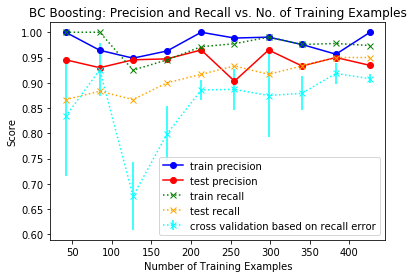

In [73]:
#graph training set size
import matplotlib.pyplot as plt
plt.figure()
plt.title('BC Boosting: Precision and Recall vs. No. of Training Examples')
#plt.ylim((0,1))

depths = [int(len(X_train)* p/100.0) for p in portions]


plt.plot(depths, depth_train_prec, 'o-', color='blue', label='train precision')
plt.plot(depths, depth_test_prec,'o-',  color='red', label='test precision')

plt.plot(depths, depth_train_recall, 'x', color='green', label='train recall', linestyle=':')
plt.errorbar(depths, depth_cross_val_recall_avg,yerr=list(depth_cross_val_recall_std), linestyle=':',fmt='x',color='cyan', label='cross validation based on recall error')
plt.plot(depths, depth_test_recall,  'x', color='orange', label='test recall', linestyle=':')

plt.xlabel("Number of Training Examples")
plt.ylabel("Score")

plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [74]:
depth_test_recall

[0.8666666666666667,
 0.8833333333333333,
 0.8666666666666667,
 0.9,
 0.9166666666666666,
 0.9333333333333333,
 0.9166666666666666,
 0.9333333333333333,
 0.95,
 0.95]